---
title: "Lecture 5: Vector and matrix norms, Classical iterative methods"
author: "Jamie Haddock"
format: 
    revealjs:
        output-file: Lecture5_slides
        slide-number: true
        chalkboard: 
            buttons: false
        preview-links: auto
        logo: figs/hmc.png
        css: input/slides.css
        incremental: true
        smaller: true
        code-fold: true
    html: 
        code-fold: true
    pdf:
        documentclass: article
        toc: true
        number-sections: true
        geometry:
          - top=1in
          - left=1in
          - bottom=1in
          - right=1in
format-links: false
jupyter: julia-1.9
filters: 
  - input/remove-pause.lua
execute:
  echo: true
  eval: true
---

# Vector and Matrix Norms

Measuring magnitude and length is fundamental to vector and matrix analysis, and will be fundamental to our analysis of numerical methods.  Recall that a **norm** $\|\cdot\|$ is a real-valued function defined over a vector space with the following properties for all vectors and scalars $\alpha$:

* $\|\mathbf{x}\| \ge 0$
* $\|\mathbf{x}\| = 0 \iff \mathbf{x} = \mathbf{0}$
* $\|\alpha \mathbf{x}\| = |\alpha| \|\mathbf{x}\|$
* $\|\mathbf{x} + \mathbf{y}\| \le \|\mathbf{x}\| + \|\mathbf{y}\|$

## Vector Norms

Perhaps the most commonly encountered vector norms on $\mathbb{R}^n$ are these three:

* $\ell_2$ norm: $\|\mathbf{x}\|_2 = \sqrt{\sum_{i=1}^n x_i^2}$
* $\ell_\infty$ norm: $\|\mathbf{x}\|_\infty = \max_{i=1, \cdots, n} |x_i|$
* $\ell_1$ norm: $\|\mathbf{x}\|_1 = \sum_{i=1}^n |x_i|$

In [24]:
using LinearAlgebra

x = [2, -3, 1, -1]
twonorm = norm(x)

3.872983346207417

In [25]:
infnorm = norm(x,Inf)

3.0

In [26]:
onenorm = norm(x,1)

7.0

---

We say that a sequence of vectors $\mathbf{x}_1, \mathbf{x}_2, \cdots$ **converges** to $\mathbf{x}$ if $$\lim_{k \rightarrow \infty} \|\mathbf{x}_k - \mathbf{x}\| = 0.$$

This will be very important as we begin to study iterative methods!

. . .

::: {.callout-warning icon=false}
## Theorem: Norm equivalence
In a finite-dimensional space, convergence in any norm implies convergence in all norms.
:::

## Matrix norms

As you may recall from Linear Algebra, the space of real-valued matrices of a given size define a vector space.  There are many norms for this vector space.  One such norm is quite interesting since it has a nice interpretation.  

. . .

This norm is the **Frobenius norm** and it is defined as $$\|\mathbf{A}\|_F = \sqrt{\sum_{i,j} A_{ij}^2}.$$

[This norm is what is by default computed by the `norm` function in Julia.]{.content-hidden when-format='revealjs' when-format='pptx'} 

[One of the most interesting aspects of this norm is that we can view it as the $\ell_2$ norm on a *vectorization* of the matrix.  If you imagine stacking columns of $\mathbf{A}$ to form a vector, then the $\ell_2$ norm of this vector is equal to the Frobenius norm of the matrix.]{.content-hidden when-format='revealjs' when-format='pptx'} 

[Matrices are actually column-stacked when stored in memory in Julia -- this is known as *column-major order*.  `MATLAB` is also column-major, while `C` and `Python` are row-major.]{.content-hidden when-format='revealjs' when-format='pptx'}

. . .

However, note that this norm does not inherently involve the *action* of the matrix as an *operator*.  There are other matrix norms which do, and these are sometimes more useful.

::: {.callout-note icon=false}
## Definition: Induced (natural) matrix norms
Given a vector norm $\|\cdot\|$, the **induced** or **natural matrix norm** for any $m \times n$ matrix $\mathbf{A}$ is $$\|\mathbf{A}\| = \max_{\|\mathbf{x}\| = 1} \|\mathbf{A}\mathbf{x}\| = \max_{\mathbf{x} \not= 0} \frac{\|\mathbf{A}\mathbf{x}\|}{\|\mathbf{x}\|}.$$
:::

---

The induced norm definition causes these norms to satisfy some useful inequalities:

::: {.callout-warning icon=false}
## Theorem: Norm inequalities
Let $\|\cdot\|$ designate a matrix norm and the vector norm that induced it.  Then for all matrices and vectors of compatible sizes, $$\|\mathbf{A}\mathbf{x}\| \le \|\mathbf{A}\| \|\mathbf{x}\|.$$
For all matrices of compatible sizes, $$\|\mathbf{A}\mathbf{B}\| \le \|\mathbf{A}\| \|\mathbf{B}\|.$$
:::

::: {.callout-caution icon=false}
## Exercise: Prove these inequalities!
:::
<details><summary>Answer:</summary> 

For the first, if $\mathbf{x} = \mathbf{0}$, then $\|\mathbf{A}\mathbf{x}\| = 0 = \|\mathbf{A}\| \|\mathbf{x}\|$.  Now, we can deal only with the case $\mathbf{x} \not= 0$, $$\frac{\|\mathbf{A}\mathbf{x}\|}{\|\mathbf{x}\|} \le \max_{\mathbf{x} \not= \mathbf{0}} \frac{\|\mathbf{A}\mathbf{x}\|}{\|\mathbf{x}\|} = \|\mathbf{A}\|.$$
</details>

<details><summary>Answer:</summary> 

For the second, $$\|\mathbf{A}\mathbf{B}\| = \max_{\mathbf{x} \not= \mathbf{0}} \frac{\|\mathbf{AB}\mathbf{x}\|}{\|\mathbf{x}\|} \le \max_{\mathbf{x} \not= \mathbf{0}} \frac{\|\mathbf{A}\|\|\mathbf{B}\mathbf{x}\|}{\|\mathbf{x}\|}\le \max_{\mathbf{x} \not= \mathbf{0}} \frac{\|\mathbf{A}\|\|\mathbf{B}\|\|\mathbf{x}\|}{\|\mathbf{x}\|} = \|\mathbf{A}\|\|\mathbf{B}\|.$$
</details>

---

The induced matrix $\infty$- and $1$-norms can be equivalently defined in terms of the entries of the matrix.

::: {.callout-warning icon=false}
## Theorem: Matrix $\infty$- and $1$-norms
$$\|\mathbf{A}\|_\infty = \max_{1 \le i \le n} \sum_{j=1}^n |A_{ij}|$$ 

$$\|\mathbf{A}\|_1 = \max_{1 \le j \le n} \sum_{i=1}^n |A_{ij}|$$
:::

In [27]:
A = [2 0; 1 -1]

2×2 Matrix{Int64}:
 2   0
 1  -1

In [28]:
Fronorm = norm(A)

2.449489742783178

In [29]:
twonorm = opnorm(A)

2.2882456112707374

---

We can also see that the entry-wise definitions of the $\infty$- and $1$-norms are equivalent to their *induced norm* definition.

In [30]:
onenorm = opnorm(A,1)

3.0

In [31]:
maximum( sum(abs.(A),dims=1) )

3

In [32]:
infnorm = opnorm(A,Inf)

2.0

In [33]:
maximum( sum(abs.(A),dims=2) )

2

---

Now, we'll try to construct a geometric interpretation of the $\ell_2$ norm.

<!--
[verbose test]{.content-hidden when-format="revealjs" when-format="pptx"}

::: {.callout-caution icon=false}
## Exercise: 

:::

<details><summary>Answer:</summary> </details>


::: {.callout-note icon=false}
## Definition: 
 
:::


::: {.callout-tip icon=false}
## Note: 
 
:::
-->

In [34]:
# sample a lot of vectors on the unit circle in R^2
theta = 2pi*(0:1/600:1)
x = [ fun(t) for fun in [cos,sin], t in theta ]; #what a cool comprehension!

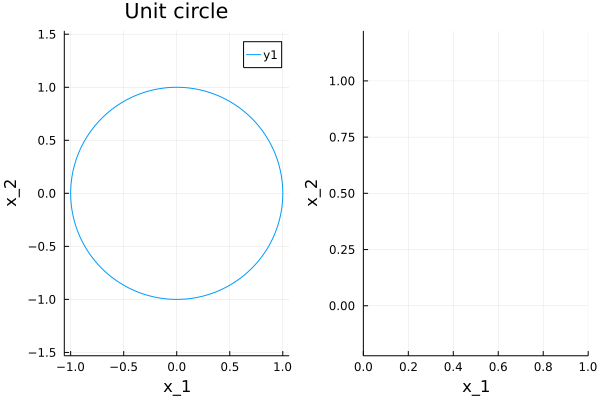

In [35]:
using Plots

plot(aspect_ratio=1, layout=(1,2), xlabel="x_1", ylabel="x_2") #creates a "layout" -- subsequent plot! calls actually add the individual subplots
plot!(x[1,:],x[2,:], subplot=1,title="Unit circle")

---

Now, the function $\mathbf{f}(\mathbf{x}) = \mathbf{A} \mathbf{x}$ defines a mapping from $\mathbb{R}^2$ to $\mathbb{R}^2$.  Let's see what this does to the vectors in the unit circle!

In [36]:
Ax = A*x;

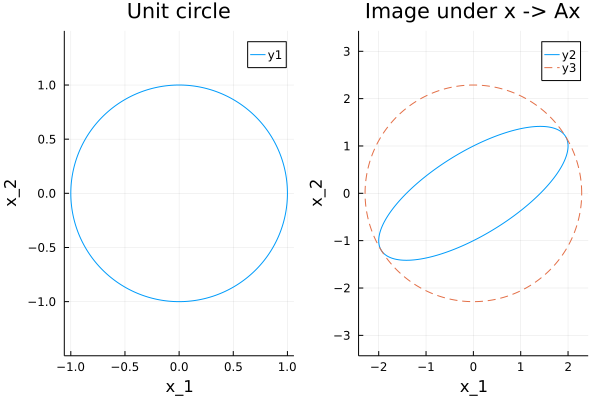

In [37]:
plot!(Ax[1,:],Ax[2,:],subplot=2,title="Image under x -> Ax")
plot!(twonorm*x[1,:],twonorm*x[2,:], subplot=2,l=:dash)

# Classical Iterative Methods for Solving Linear Systems

We've talked a bit last week about *direct* methods for solving linear systems of equations.  There is another class of methods known as *iterative methods* which use an iterative sequence of steps to make incremental improvement of an approximate solution to the system.

. . .

These methods typically use information from some subset of the system to make iterative improvements to the approximate solution (**iterate**).  

## Jacobi's Method

The first method hinges on the observation that if $\mathbf{A}\mathbf{x} = \mathbf{b}$ then $$A_{i1}x_1 + A_{i2}x_2 + \cdots + A_{ii}x_i + \cdots + A_{in} x_n = b_i \text{ for } i = 1, \cdots, n.$$

. . .

This can be arranged as $$x_i = \frac{1}{A_{ii}} \left[ \sum_{j = 1\\j\not= i}^n (-A_{ij}x_j) + b_i \right] \text{ for } i=1, \cdots, n.$$

---

Jacobi's method uses this observation iteratively, forcing the $i$th component of the current approximation to satisfy the $i$th equation, that is $\mathbf{x}^{(k)}$ satisfies $$x_i^{(k)} = \frac{1}{A_{ii}} \left[ \sum_{j = 1\\j\not= i}^n (-A_{ij}x_j^{(k-1)}) + b_i \right] \text{ for } i=1, \cdots, n.$$

. . .

::: {.callout-caution icon=false}
## Exercise: Sketch Jacobi's method
Sketch two iterations of Jacobi's method applied to the system visualized below with the given initial iterate, $\mathbf{x}^{(0)}$.
:::
<details><summary>System:</summary> 
![](figs/system_empty.png){height=200}
</details>

<details><summary>Answer:</summary> 
![](figs/jacobi_steps.png){height=200}
</details>

[You should also think about what happens here if the order of the equations is changed or if the initial iterate is somewhere else.  Spoiler alert: Jacobi's method doesn't always converge!]{.content-hidden when-format='revealjs' when-format='pptx'} 

## Matrix-vector form of Jacobi update

We can collect all of the updates to the coordinates of $\mathbf{x}^{(k)}$ together into a vector update.  

. . .

Note that we can rewrite $\mathbf{A}\mathbf{x} = \mathbf{b}$ as $$\mathbf{D}(\mathbf{A})\mathbf{x} + \mathbf{L}(\mathbf{A})\mathbf{x} + \mathbf{U}(\mathbf{A})\mathbf{x} = \mathbf{b}$$ where $\mathbf{D}(\mathbf{A})$ is the diagonal matrix containing the diagonal elements of $\mathbf{A}$, $\mathbf{L}(\mathbf{A})$ is the strictly lower-triangular matrix containing the strictly lower-triangular elements of $\mathbf{A}$, and $\mathbf{U}(\mathbf{A})$ is the strictly upper-triangular matrix containing the strictly upper-triangular elements of $\mathbf{A}$.

. . .

In this notation, the Jacobi iterates satisfy $$\mathbf{D}(\mathbf{A})\mathbf{x} + \mathbf{L}(\mathbf{A})\mathbf{x} + \mathbf{U}(\mathbf{A})\mathbf{x} = \mathbf{b}$$